In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import time
import sys
from random import randint
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import manifold, datasets


# read mask

(480, 640, 3)


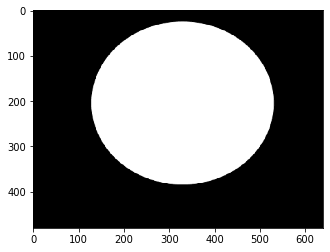

In [2]:
mask = np.array(cv2.imread('mask.png'))/255
print(mask.shape)
plt.imshow(mask,plt.cm.gray)

# read file for `white` picture

In [3]:
def read_while_file():
    print("reading data of white...")
    file_path='d:/Special_topic/pleurotus_eryngii/white/*'
    file_name = glob.glob(file_path)
    file_num = len(file_name)

    data = np.zeros((file_num,480,640,3),dtype=np.uint8)
    for i in range(file_num):
        data[i] = cv2.imread(file_name[i]) * mask

    ## plot image for white data
    # data = data.astype('uint8')
    # plt.figure(figsize=(10,5))
    # for i in range(file_num):
    #     plt.subplot(3,3,i+1)
    #     plt.axis("off")
    #     plt.title(file_name[i])
    #     plt.imshow(cv2.cvtColor(data[i], cv2.COLOR_BGR2RGB))
    # plt.show()

    print("reading data of white sucessful\n")
    return data


white_data = read_while_file()


reading data of white...
reading data of white sucessful



# read file for data picture

In [4]:
# read file path
# file path 1030 1104 1108 1118 1122

def read_data_file():
    print("reading data....")

    file_path='d:/Special_topic/pleurotus_eryngii/*'
    folder_name = glob.glob(file_path)[:5]
    file_name=[]
    for folder_name in folder_name:
        count = 0
        for fname in glob.glob(folder_name+"/*"):
            file_name.append(fname)
            count+=1
            if(count==108):
                break
    data_Gnum = len(file_name)//9
    print("data_Gnum = ", data_Gnum)

    ## [data_Gnum][NumOfPicture][picture(480*640*wave)]
    data_black = np.zeros((data_Gnum,480,640,9),dtype=np.uint8)
    data       = np.zeros((data_Gnum,480,640,18),dtype=np.uint8)
    print("data_black.shpae = ",data_black.shape)
    print("data.shpae = ",data.shape)

    print("processing group")
    for group in range(data_Gnum):
        print("{}/{}".format(group+1,data_Gnum),end="\t")

        for black in range(3):
            data_black[group][:,:,black*3:black*3+3] = cv2.imread(file_name[group*9+black]) * mask

        for LED in range(6):
            data[group][:,:,LED*3:LED*3+3] = cv2.imread(file_name[group*9+3+LED]) * mask

    print("\nreading data sucessful\n")
    return data, data_black, data_Gnum

#=========================================================
data, data_black, data_Gnum = read_data_file()
del data_black,mask

reading data....
data_Gnum =  60
data_black.shpae =  (60, 480, 640, 9)
data.shpae =  (60, 480, 640, 18)
processing group
1/60	2/60	3/60	4/60	5/60	6/60	7/60	8/60	9/60	10/60	11/60	12/60	13/60	14/60	15/60	16/60	17/60	18/60	19/60	20/60	21/60	22/60	23/60	24/60	25/60	26/60	27/60	28/60	29/60	30/60	31/60	32/60	33/60	34/60	35/60	36/60	37/60	38/60	39/60	40/60	41/60	42/60	43/60	44/60	45/60	46/60	47/60	48/60	49/60	50/60	51/60	52/60	53/60	54/60	55/60	56/60	57/60	58/60	59/60	60/60	
reading data sucessful



In [5]:
# solve div0 question

# def div0( a, b ):
#     """ ignore / 0, div0( [-1, 0, 1], 0 ) -> [0, 0, 0] """
#     with np.errstate(divide='ignore', invalid='ignore'):
#         c = np.divide(a,b)
#         c[ ~ np.isfinite( c )] = 0  # -inf inf NaN
#     return c

def div0(a,b):
    b[b==0] = -1
    c = a/b
    c[c<0] = 0
    return c

def print_info(img):
    print("max =",np.amax(img))
    print("min =",np.amin(img))
    print("mean=",np.mean(img))

a = np.array([1.,0.,0.], dtype='float')
b = np.array([0.,1.,0.], dtype='float')
c = div0(a,b)
print(div0(a,b))

[ 0.  0. -0.]


# calculate reflectivity

In [6]:
## initialization
# [data_Gnum][NumOfPicture(LED)][picture(480*640*3)]
reflectivity = np.zeros_like(data, dtype='float32')
print("reflectivity.shape=", reflectivity.shape)
white_data = white_data.astype('float32')
data = data.astype('float32')
print()

dark_30 = white_data[2]
dark_40 = white_data[0]
dark_100= white_data[1]
# print("dark_100.shape=",dark_100.shape)

LED1_white = white_data[3]
LED2_white = white_data[4]
LED3_white = white_data[5]
LED4_white = white_data[5]
LED5_white = white_data[7]
LED6_white = white_data[8]
# print("LED6_white.shape=",LED6_whdef array_divide(a,b):


print(type(dark_30[0][0][0]))
del white_data

reflectivity.shape= (60, 480, 640, 18)

<class 'numpy.float32'>


In [7]:
for Gnum in range(data_Gnum):
    LED = np.zeros((6,480,640,3),dtype=np.float32)
    for i in range(6):
        LED[i] = data[Gnum][:,:,i*3:i*3+3]

    reflectivity[Gnum][:,:,0:3]   = div0((LED[0]-dark_40) , (LED1_white-dark_40))
    reflectivity[Gnum][:,:,3:6]   = div0((LED[1]-dark_30) , (LED2_white-dark_30))
    reflectivity[Gnum][:,:,6:9]   = div0((LED[2]-dark_30) , (LED3_white-dark_30))
    reflectivity[Gnum][:,:,9:12]  = div0((LED[3]-dark_30) , (LED4_white-dark_30))
    reflectivity[Gnum][:,:,12:15] = div0((LED[4]-dark_30) , (LED5_white-dark_30))
    reflectivity[Gnum][:,:,15:]   = div0((LED[5]-dark_100), (LED6_white-dark_100))

    # temp1 = (LED1-dark_30)
    # temp2 = LED1_white-dark_30
    # temp3 = div0(temp1,temp2)

    # temp3[temp3<0] = 0
    # temp3[temp3>1] = 1

    print("processing group {} ...".format(Gnum))

reflectivity[reflectivity<0] = 0
reflectivity[reflectivity>1] = 1
print("process sucessful\n")
del LED,LED1_white,LED2_white,LED3_white,LED4_white,LED5_white,LED6_white,dark_30,dark_40,dark_100
del data

processing group 0 ...
processing group 1 ...
processing group 2 ...
processing group 3 ...
processing group 4 ...
processing group 5 ...
processing group 6 ...
processing group 7 ...
processing group 8 ...
processing group 9 ...
processing group 10 ...
processing group 11 ...
processing group 12 ...
processing group 13 ...
processing group 14 ...
processing group 15 ...
processing group 16 ...
processing group 17 ...
processing group 18 ...
processing group 19 ...
processing group 20 ...
processing group 21 ...
processing group 22 ...
processing group 23 ...
processing group 24 ...
processing group 25 ...
processing group 26 ...
processing group 27 ...
processing group 28 ...
processing group 29 ...
processing group 30 ...
processing group 31 ...
processing group 32 ...
processing group 33 ...
processing group 34 ...
processing group 35 ...
processing group 36 ...
processing group 37 ...
processing group 38 ...
processing group 39 ...
processing group 40 ...
processing group 41 ...
pr

 group 0 ==================================


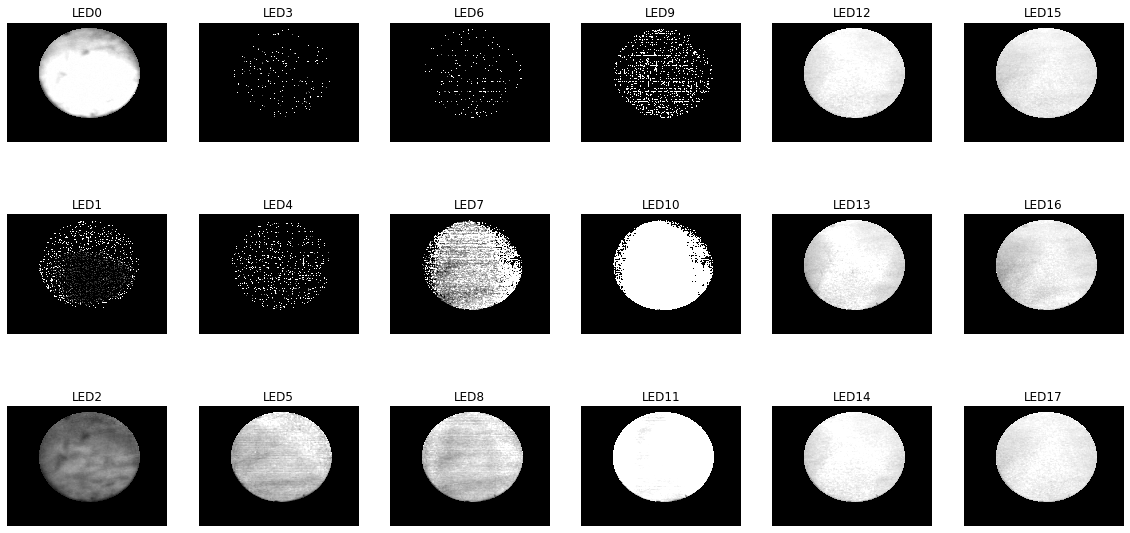

In [8]:
def set_figure_size():
    plt.figure(figsize=(20,10))

# [data_Gnum][NumOfPicture(LED)][picture(480*640*3)]
for Gnum in range(data_Gnum):
    print(" group {} ==================================".format(Gnum))

    set_figure_size()
    figure_index = 0
    for col in range(6):
        for row in range(3):
            plt.subplot(3,6,col+1+row*6)
            plt.axis("off")
            plt.title("LED{}".format(figure_index))
            plt.imshow(reflectivity[Gnum][:,:,figure_index], plt.cm.gray, vmax=1.0)
            figure_index += 1
    plt.show()
    break


# del data witch we don't want

 group 0 ==================================


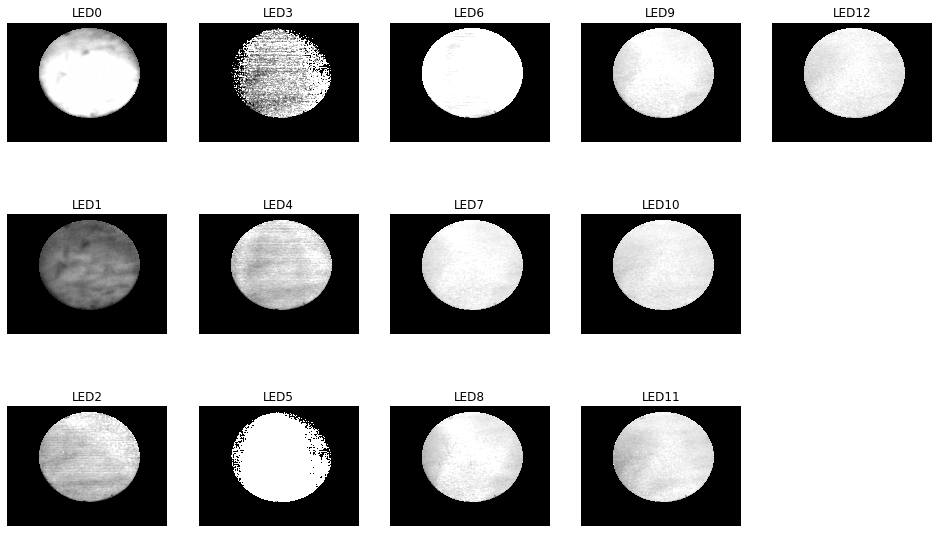

In [9]:
reflectivity_process = reflectivity
reflectivity_process = np.delete(reflectivity_process,9,3)
reflectivity_process = np.delete(reflectivity_process,6,3)
reflectivity_process = np.delete(reflectivity_process,4,3)
reflectivity_process = np.delete(reflectivity_process,3,3)
reflectivity_process = np.delete(reflectivity_process,1,3)

def set_figure_size():
    plt.figure(figsize=(20,10))

# [data_Gnum][NumOfPicture(LED)][picture(480*640*3)]
for Gnum in range(data_Gnum):
    if(Gnum==1):
        break

    print(" group {} ==================================".format(Gnum))
    set_figure_size()
    figure_index = 0
    for col in range(6):
        for row in range(3):
            if(figure_index==13):
                break
            plt.subplot(3,6,col+1+row*6)
            plt.axis("off")
            plt.title("LED{}".format(figure_index))
            plt.imshow(reflectivity_process[Gnum][:,:,figure_index], plt.cm.gray, vmax=1.0)
            figure_index += 1
    plt.show()
del reflectivity

# OSP

def rho(arr):
    sum=0
    for i in arr:
        sum += i**2
    r = sum**0.5
    return r


def OSPfn(M, U):
    (l, p) = M.shape
    P_U = np.identity(l) - U.dot(np.linalg.pinv(U));
    nu = np.zeros((p,1))
    for i in range(p):
        nu[i] = rho(P_U.dot(M[:,i]))
    return nu


# change reflectivity_process([group][image*image][band]) to
#        osp_process([group][band][image*image])
cube_arr = reflectivity_process
(group, x ,y ,band) = cube_arr.shape
cube_arr = cube_arr.transpose(0,3,1,2).reshape(group, band, x*y)
(group, band , img_p) = cube_arr.shape #img_p = number of image pixel
print(cube_arr.shape)

# select undesired or interfering signatures
u1 = reflectivity_process[0,177,170,:]
u2 = reflectivity_process[0,89 ,265,:]
u3 = reflectivity_process[0,86 ,285,:]
U = np.stack((u1,u2,u3), axis=1)
# print("U =", U)
# print("U.shpae = ", U.shape)
# print("cube_arr.shpae = ", cube_arr.shape)
threshold = 0.1
out = OSPfn(cube_arr[0], U).reshape((480,640))
out[out>=threshold] = 1
out[out<threshold] = 0
plt.imshow(out,plt.cm.gray, vmax=1.0)
plt.show()


# t-SNE

In [10]:
# transpose and reshape tSNE_data_p
print(reflectivity_process.shape)
tSNE_data_p = reflectivity_process
tSNE_data_p = tSNE_data_p.transpose(0,3,1,2)
(group,band,x,y) = tSNE_data_p.shape
tSNE_data_p = tSNE_data_p.reshape(group,band,x*y)
(group,band,xy) = tSNE_data_p.shape
tSNE_data_p = tSNE_data_p.reshape(group,band*xy)
print(tSNE_data_p.shape)
# plt.imshow(tSNE_data_p[0],plt.cm.gray,vmax=1)
# plt.show()


(60, 480, 640, 13)
(60, 3993600)


In [11]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
tSNE_data = tsne.fit_transform(tSNE_data_p)

print("Org data dimension is {}\n\
Embedded data dimension is {}".format(tSNE_data_p.shape[-1], tSNE_data.shape[-1]))

'''嵌入空间可视化'''
data_min, data_max = tSNE_data.min(0), tSNE_data.max(0)
data_norm = (tSNE_data - data_min) / (data_max - data_min)  # 归一化
del tSNE_data_p

Org data dimension is 3993600
Embedded data dimension is 2


In [12]:
print("data_norm.shape = ",data_norm.shape)

data_norm.shape =  (60, 2)


In [13]:
colormap = plt.cm.rainbow(np.linspace(0, 1, data_norm.shape[0]))
print(colormap.shape)


(60, 4)


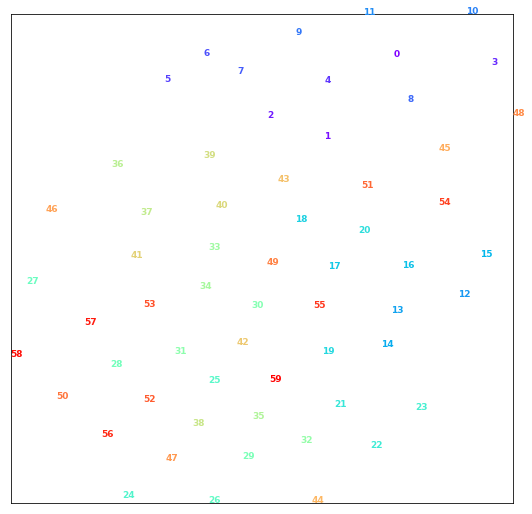

In [14]:
plt.figure(figsize=(9, 9))
for i in range(data_norm.shape[0]):
    plt.text(data_norm[i, 0], data_norm[i, 1], str(i), color=colormap[i],
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

# PCA

In [15]:
print(reflectivity_process.shape)
PCA_data_p = reflectivity_process
PCA_data_p = PCA_data_p.transpose(0,3,1,2)
(group,band,x,y) = PCA_data_p.shape
PCA_data_p = PCA_data_p.reshape(group,band,x*y)
(group,band,xy) = PCA_data_p.shape
PCA_data_p = PCA_data_p.reshape(group,band*xy)
print(PCA_data_p.shape)

(60, 480, 640, 13)
(60, 3993600)


In [16]:
print("PCA建模")
pca = PCA(n_components=2)
pca.fit(PCA_data_p)
X_dr = pca.transform(PCA_data_p)
del PCA_data_p

==========PCA建模==============


In [17]:
print(X_dr.shape)
colormap = plt.cm.rainbow(np.linspace(0, 1, X_dr.shape[0]))
print(colormap.shape)

(60, 2)
(60, 4)


In [18]:
print   #PCA normal
data_min, data_max = X_dr.min(0), X_dr.max(0)
data_norm = (X_dr - data_min) / (data_max - data_min)
#print(data_norm)

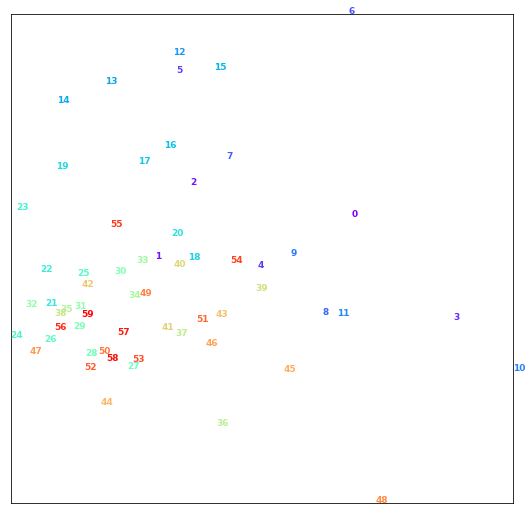

In [19]:
plt.figure(figsize=(9, 9))
for i in range(data_norm.shape[0]):
    plt.text(data_norm[i, 0], data_norm[i, 1], str(i), color=colormap[i],
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()